In [4]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from sklearn.metrics import confusion_matrix, precision_recall_curve, roc_curve, auc, log_loss, plot_roc_curve
from sklearn import metrics

# Data Analysis

In [5]:
df = pd.read_csv("C:\\Users\\ranab\\Downloads\\Churn_Modelling.csv")

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   RowNumber        10000 non-null  int64  
 1   CustomerId       10000 non-null  int64  
 2   Surname          10000 non-null  object 
 3   CreditScore      10000 non-null  int64  
 4   Geography        10000 non-null  object 
 5   Gender           10000 non-null  object 
 6   Age              10000 non-null  int64  
 7   Tenure           10000 non-null  int64  
 8   Balance          10000 non-null  float64
 9   NumOfProducts    10000 non-null  int64  
 10  HasCrCard        10000 non-null  int64  
 11  IsActiveMember   10000 non-null  int64  
 12  EstimatedSalary  10000 non-null  float64
 13  Exited           10000 non-null  int64  
dtypes: float64(2), int64(9), object(3)
memory usage: 1.1+ MB


In [7]:
df.describe()

,RowNumber,CustomerId,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
count,10000.00000,1.000000e+04,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.00000,10000.000000,10000.000000,10000.000000
mean,5000.50000,1.569094e+07,650.528800,38.921800,5.012800,76485.889288,1.530200,0.70550,0.515100,100090.239881,0.203700
std,2886.89568,7.193619e+04,96.653299,10.487806,2.892174,62397.405202,0.581654,0.45584,0.499797,57510.492818,0.402769
min,1.00000,1.556570e+07,350.000000,18.000000,0.000000,0.000000,1.000000,0.00000,0.000000,11.580000,0.000000
25%,2500.75000,1.562853e+07,584.000000,32.000000,3.000000,0.000000,1.000000,0.00000,0.000000,51002.110000,0.000000
50%,5000.50000,1.569074e+07,652.000000,37.000000,5.000000,97198.540000,1.000000,1.00000,1.000000,100193.915000,0.000000
75%,7500.25000,1.575323e+07,718.000000,44.000000,7.000000,127644.240000,2.000000,1.00000,1.000000,149388.247500,0.000000
max,10000.00000,1.581569e+07,850.000000,92.000000,10.000000,250898.090000,4.000000,1.00000,1.000000,199992.480000,1.000000


In [5]:
df.shape

(10000, 14)

In [8]:
df['Exited'].value_counts()

0    7963
1    2037
Name: Exited, dtype: int64

In [6]:
df.head(10)

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0
5,6,15574012,Chu,645,Spain,Male,44,8,113755.78,2,1,0,149756.71,1
6,7,15592531,Bartlett,822,France,Male,50,7,0.00,2,1,1,10062.80,0
7,8,15656148,Obinna,376,Germany,Female,29,4,115046.74,4,1,0,119346.88,1
8,9,15792365,He,501,France,Male,44,4,142051.07,2,0,1,74940.50,0
9,10,15592389,H?,684,France,Male,27,2,134603.88,1,1,1,71725.73,0


In [7]:
df.isna().sum()

RowNumber          0
CustomerId         0
Surname            0
CreditScore        0
Geography          0
Gender             0
Age                0
Tenure             0
Balance            0
NumOfProducts      0
HasCrCard          0
IsActiveMember     0
EstimatedSalary    0
Exited             0
dtype: int64

In [8]:
columns = list(df.columns)
for i in columns:
    print(df[i].value_counts())

1        1
6671     1
6664     1
6665     1
6666     1
        ..
3334     1
3335     1
3336     1
3337     1
10000    1
Name: RowNumber, Length: 10000, dtype: int64
15634602    1
15667932    1
15766185    1
15667632    1
15599024    1
           ..
15599078    1
15702300    1
15660735    1
15671390    1
15628319    1
Name: CustomerId, Length: 10000, dtype: int64
Smith       32
Scott       29
Martin      29
Walker      28
Brown       26
            ..
Izmailov     1
Bold         1
Bonham       1
Poninski     1
Burbidge     1
Name: Surname, Length: 2932, dtype: int64
850    233
678     63
655     54
705     53
667     53
      ... 
404      1
351      1
365      1
417      1
419      1
Name: CreditScore, Length: 460, dtype: int64
France     5014
Germany    2509
Spain      2477
Name: Geography, dtype: int64
Male      5457
Female    4543
Name: Gender, dtype: int64
37    478
38    477
35    474
36    456
34    447
     ... 
92      2
82      1
88      1
85      1
83      1
Name: Age, Lengt

In [9]:
columns = df.columns
for i in columns:
    print("Column %s has "%(i),df[i].nunique(), "variables")

Column RowNumber has  10000 variables
Column CustomerId has  10000 variables
Column Surname has  2932 variables
Column CreditScore has  460 variables
Column Geography has  3 variables
Column Gender has  2 variables
Column Age has  70 variables
Column Tenure has  11 variables
Column Balance has  6382 variables
Column NumOfProducts has  4 variables
Column HasCrCard has  2 variables
Column IsActiveMember has  2 variables
Column EstimatedSalary has  9999 variables
Column Exited has  2 variables


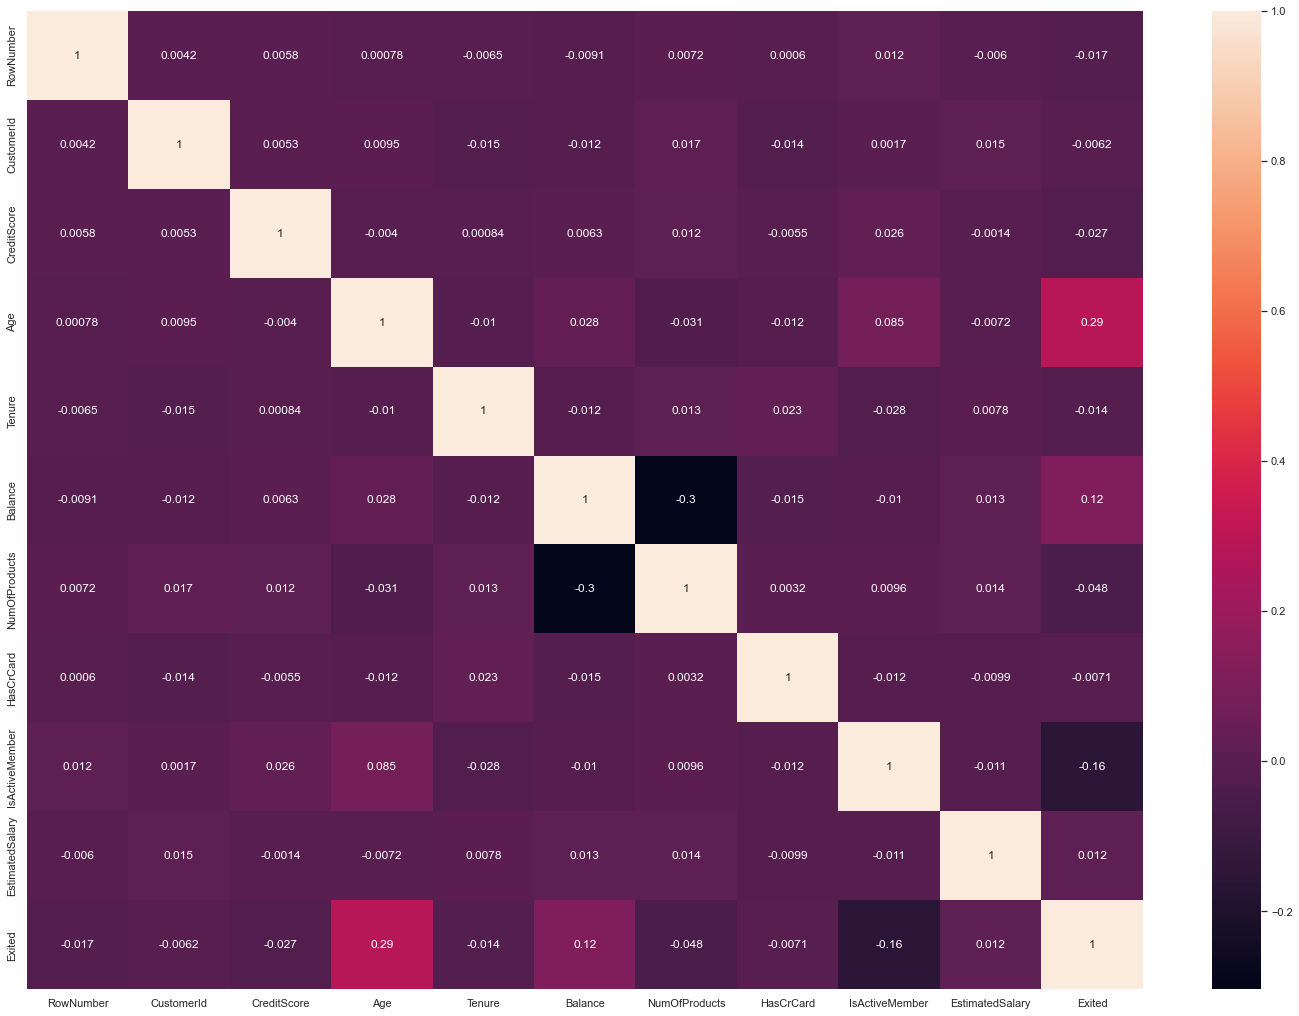

In [36]:
plt.figure()
cor = df.corr()
sns.set(rc={'figure.figsize':(25,18)})
sns.heatmap(cor,annot=True)
plt.show()

In [11]:
df1 = df.drop(columns=['RowNumber'],axis=1)

In [12]:
df1.to_csv("churn_modelling_preprocessed.csv")

# Data Encoding

In [13]:
from sklearn.preprocessing import StandardScaler,MinMaxScaler
scaler = StandardScaler()

In [14]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()

In [15]:
label = le.fit_transform(df1['Surname'])
df1['Surname'] = label
label =le.fit_transform(df1['Gender'])
df1['Gender'] = label
label = le.fit_transform(df1['Geography'])
df1['Geography'] = label

# Data Splitting

In [16]:
Y = df1.iloc[:,12]
X = df1.iloc[:,1:12]

In [17]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,Y,test_size = 0.25,random_state = 0)
X_train

,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary
2967,667,579,1,0,39,5,117833.30,3,0,0,5831.00
700,1108,750,0,0,32,5,0.00,2,1,0,95611.47
3481,1388,729,2,0,34,9,53299.96,2,1,1,42855.97
1621,1449,689,2,1,38,5,75075.14,1,1,1,8651.92
800,2147,605,0,1,52,7,0.00,2,1,1,173952.50
...,...,...,...,...,...,...,...,...,...,...,...
9225,2680,594,1,0,32,4,120074.97,2,1,1,162961.79
4859,2803,794,2,0,22,4,114440.24,1,1,1,107753.07
3264,1202,738,0,1,35,5,161274.05,2,1,0,181429.87
9845,2122,590,2,0,38,9,0.00,2,1,1,148750.16


# Model Prediction

In [18]:
from sklearn.linear_model import LogisticRegression
regressor = LogisticRegression()
clc = regressor.fit(X_train, y_train)
regressor

LogisticRegression()

In [19]:
y_pred = clc.predict(X_test)
Y_pred = []
threshold=0.5
for i in y_pred:
    if i< threshold:
        Y_pred.append(0)
    else:
        Y_pred.append(1)

In [20]:
Y_pred
y_test

9394    0
898     1
2398    0
5906    0
2343    0
       ..
8764    0
4359    0
2041    0
1108    0
3332    0
Name: Exited, Length: 2500, dtype: int64

In [45]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(Y_pred,y_test)
cm

array([[1937,  478],
       [  54,   31]], dtype=int64)

# Test Accuracy

In [46]:
from sklearn.metrics import accuracy_score
accuracy_score(Y_pred,y_test)


0.7872

In [28]:
y1_pred = clc.predict(X_train)
Y1_pred = []
threshold=0.5
for i in y1_pred:
    if i< threshold:
        Y1_pred.append(0)
    else:
        Y1_pred.append(1)

# Train Accuracy

In [48]:
from sklearn.metrics import accuracy_score
accuracy_score(Y1_pred,y_train)

0.7905333333333333

# Data Visualization

In [21]:
[fpr, tpr, thr] = roc_curve(y_test, y_pred)
[fpr, tpr, thr]

[array([0.        , 0.02712205, 1.        ]),
 array([0.        , 0.06090373, 1.        ]),
 array([2, 1, 0], dtype=int64)]

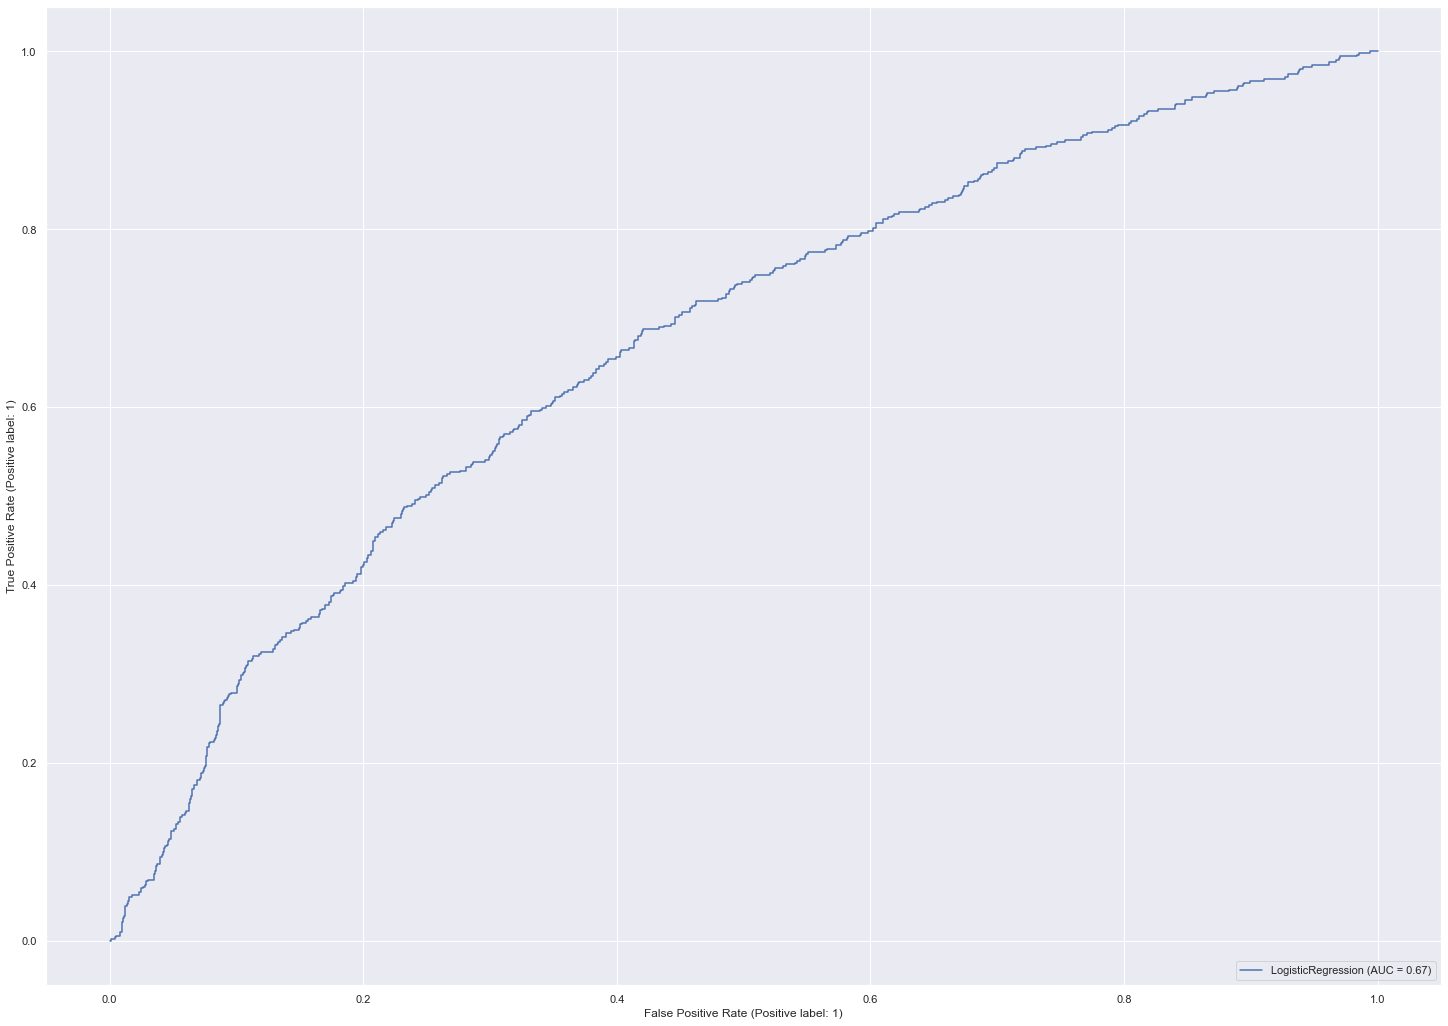

In [26]:
plot_roc_curve(clc, X_test, y_test) 

<AxesSubplot:xlabel='Exited', ylabel='Age'>

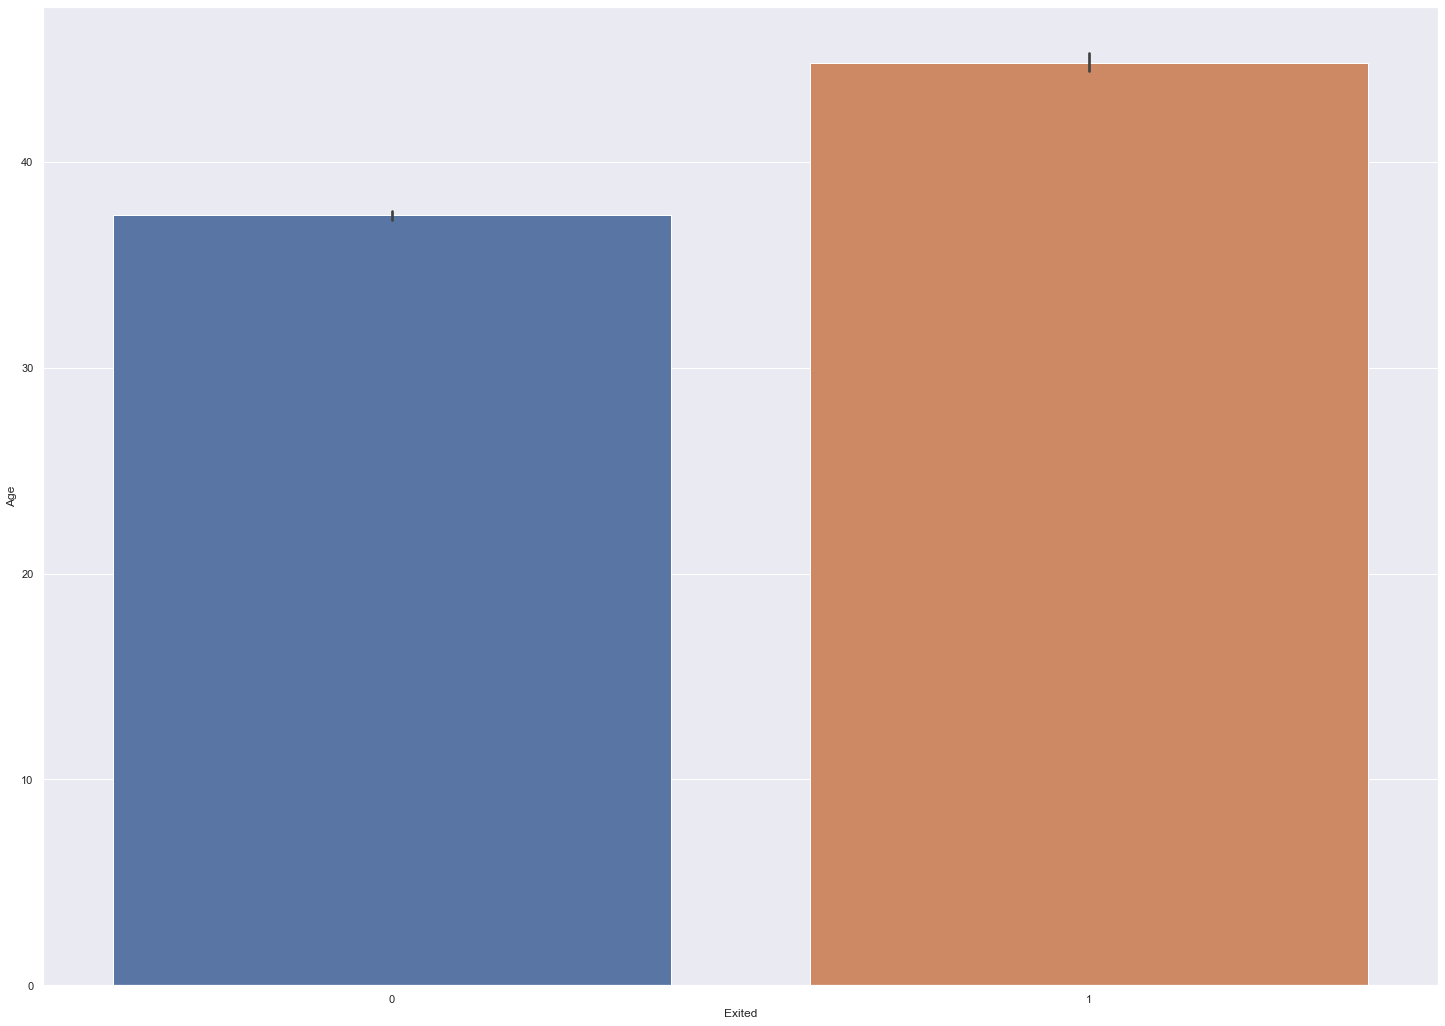

In [34]:
sns.barplot(data=df1,x='Exited',y='Age')

In [40]:
regressor.intercept_

array([-0.00016606])